In [3]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#importing the Iris dataset with pandas
dataset = pd.read_csv('C:\\Users\\ashranja\\Downloads\\Iris.csv')
x = dataset.iloc[:, [0, 1, 2, 3]].values


In [4]:
?pd.read_excel

In [7]:
#x
from sklearn.cluster import KMeans

In [8]:
?KMeans

Init signature:
KMeans(
    n_clusters=8,
    init='k-means++',
    n_init=10,
    max_iter=300,
    tol=0.0001,
    precompute_distances='auto',
    verbose=0,
    random_state=None,
    copy_x=True,
    n_jobs=None,
    algorithm='auto',
)
Docstring:     
K-Means clustering

Read more in the :ref:`User Guide <k_means>`.

Parameters
----------

n_clusters : int, optional, default: 8
    The number of clusters to form as well as the number of
    centroids to generate.

init : {'k-means++', 'random' or an ndarray}
    Method for initialization, defaults to 'k-means++':

    'k-means++' : selects initial cluster centers for k-mean
    clustering in a smart way to speed up convergence. See section
    Notes in k_init for more details.

    'random': choose k observations (rows) at random from data for
    the initial centroids.

    If an ndarray is passed, it should be of shape (n_clusters, n_features)
    and gives the initial centers.

n_init : int, default: 10
    Number of time the 

In [8]:
#dir(sklearn)


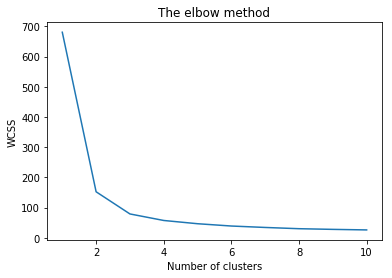

In [9]:
#Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, \
                    n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    #print(wcss)
    #print(kmeans.precompute_distances)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [9]:
#Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

In [10]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [13]:
kmeans.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [7]:
kmeans.cluster_centers_[:, 1]

array([2.7483871 , 3.418     , 3.07368421])

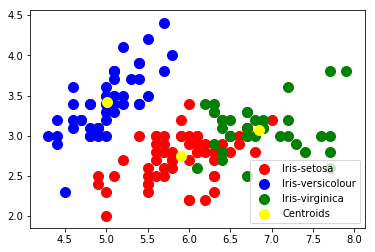

In [8]:
% matplotlib inline
#Visualising the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

# Hierarchial Clustering 

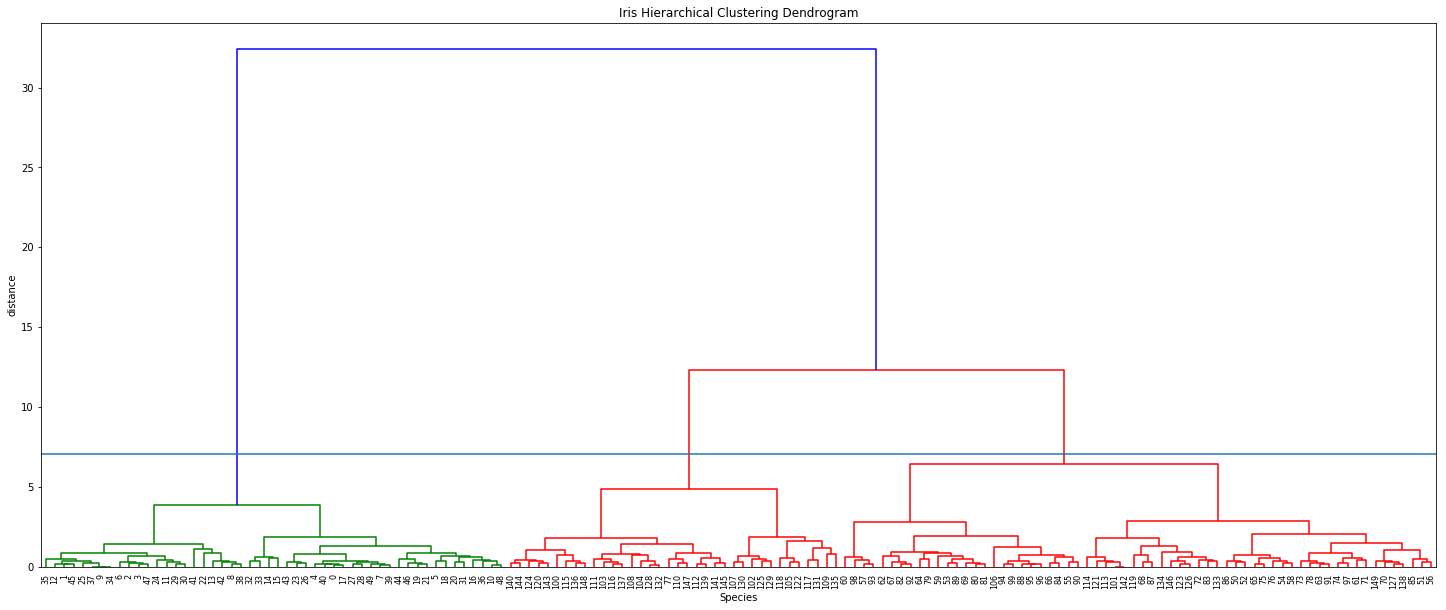

In [12]:
# calculate full dendrogram
from scipy.cluster.hierarchy import dendrogram, linkage

# generate the linkage matrix
Z = linkage(x, 'ward')

# set cut-off to 150
max_d = 7.08                # max_d as in max_distance

plt.figure(figsize=(25, 10))
plt.title('Iris Hierarchical Clustering Dendrogram')
plt.xlabel('Species')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=150,                  # Try changing values of p
    leaf_rotation=90.,      # rotates the x axis labels
    leaf_font_size=8.,      # font size for the x axis labels
)
plt.axhline(y=max_d)
plt.show()

In [14]:
?fcluster

Signature: fcluster(Z, t, criterion='inconsistent', depth=2, R=None, monocrit=None)
Docstring:
Form flat clusters from the hierarchical clustering defined by
the given linkage matrix.

Parameters
----------
Z : ndarray
    The hierarchical clustering encoded with the matrix returned
    by the `linkage` function.
t : scalar
    For criteria 'inconsistent', 'distance' or 'monocrit',
     this is the threshold to apply when forming flat clusters.
    For 'maxclust' or 'maxclust_monocrit' criteria,
     this would be max number of clusters requested.
criterion : str, optional
    The criterion to use in forming flat clusters. This can
    be any of the following values:

      ``inconsistent`` :
          If a cluster node and all its
          descendants have an inconsistent value less than or equal
          to `t` then all its leaf descendants belong to the
          same flat cluster. When no non-singleton cluster meets
          this criterion, every node is assigned to its own
    

In [19]:
 from scipy.cluster.hierarchy import fcluster
fl = fcluster(Z,3,criterion='maxclust')

In [21]:
fl
pd.Series(fl).value_counts()

3    64
1    50
2    36
dtype: int64

In [17]:
pd.Series(y_kmeans).value_counts()

0    62
1    50
2    38
dtype: int64